## Import libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Fitness and permutations

In [2]:
def clashes(poblacion):
    conflictos = 0
    for i in range(poblacion.shape[0]):
        for j in range(poblacion.shape[0]):
            if i != j:
                if poblacion[i] == poblacion[j]:
                    conflictos += 1
                if abs(i - j) == abs(poblacion[i] - poblacion[j]):
                    conflictos += 1
    return conflictos

def fitness(parents):
    return sorted(parents, key=lambda x: clashes(x))
    
def randomCrossOver(paths, mutationRate=0.1):
    index = np.random.randint(0, len(paths[0]), 2)
    selection = paths[0][index[0]:index[1]]
    mask = np.isin(paths[1], np.setdiff1d(paths[1], selection))
    return np.append(paths[1][mask], selection)

def crossOver(paths, totalPaths=10, mutationRate=0.6):
    newPaths = [paths[0]]
    for i in range(1, totalPaths):
        if np.random.random() < mutationRate:
            index = np.random.randint(0, len(paths), 2)
            newPaths.append(randomCrossOver([paths[index[0]], paths[index[1]]]))
    return newPaths

def mutation(paths, mutationRate=0.001):
    for i in range(1, len(paths)):
        if np.random.random() < mutationRate:
            index = np.random.randint(0, len(paths[0]), 2)
            paths[i][index[0]], paths[i][index[1]] = paths[i][index[1]], paths[i][index[0]]
    return paths

## Genetic Algorithm

In [3]:
def GeneticAlgorithm(parents, takebest=8, iteraciones=100):
    res = []
    for i in range(iteraciones):        
        parents = fitness(parents)        
        res.append([parents[0],clashes(parents[0])])
        if(clashes(parents[0]) == 0):
            break
        parents = crossOver(parents, takebest)
        parents = mutation(parents)
    df = pd.DataFrame(res, columns=['solucion', 'conflictos'])
    return fitness(parents), df 

<AxesSubplot:>

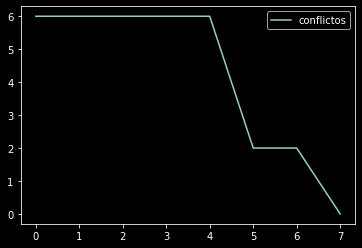

In [5]:
n = 8
positions = np.arange(n, dtype=int)
positions = [np.random.permutation(positions) for i in range(n)] 

res,df= GeneticAlgorithm(positions,takebest=n,iteraciones=10000)
df.plot()

In [6]:
df.tail()

,solucion,conflictos
3,"[0, 6, 2, 5, 7, 1, 4, 3]",6
4,"[0, 6, 2, 5, 7, 1, 4, 3]",6
5,"[4, 0, 3, 6, 2, 5, 7, 1]",2
6,"[4, 0, 3, 6, 2, 5, 7, 1]",2
7,"[4, 1, 7, 0, 3, 6, 2, 5]",0


## Plotting the last solution

[4 1 7 0 3 6 2 5] 0


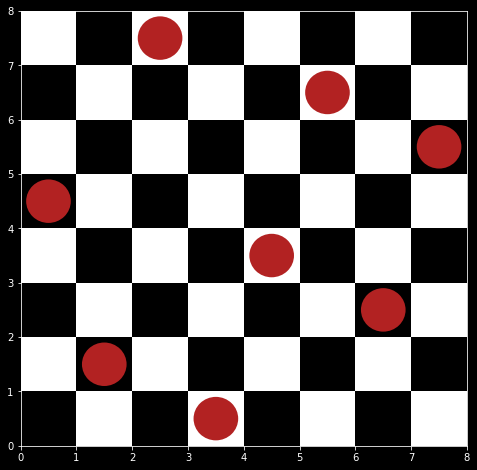

In [7]:
def plotsolution(solucion , n):
    fig = plt.figure(figsize=(n,n))
    ax = fig.add_subplot(111)
    ax.set_xlim(0,n)
    ax.set_ylim(0,n)

    for i in range(n):
        for j in range(n):
            if (i+j)%2==0:
                ax.add_patch(plt.Rectangle((i,j),1,1, facecolor='black'))
            else:
                ax.add_patch(plt.Rectangle((i,j),1,1, facecolor='white'))

    for i in range(n):
        ax.add_patch(plt.Circle((i+.5,solucion[0][i]+.5), 0.4, facecolor='firebrick'))

    plt.show()
print(res[0], clashes(res[0]))
plotsolution(res,n)

## Experiments

In [52]:
n = 8
population = np.arange(n, dtype=int)
population = [np.random.permutation(population) for i in range(n)] 

def checkingWholeSetFitness(population):
    totalSum = []
    for i in range(100000):
        for fitnessScore in list(map(clashes, population)):
            totalSum.append(fitnessScore)
    print(f'Mean: {np.mean(totalSum)}')
    print(f'Stdev: {np.std(totalSum)}')
    print(f'Min: {min(totalSum)}')
    print(f'Max: {max(totalSum)}')

checkingWholeSetFitness(population)

Mean: 9.25
Stdev: 2.6339134382131846
Min: 4
Max: 14


In [61]:
# Running the experiment 200 times
generations = []
iterations = 1000

def experimentNumberIterations(population, n):
    global generations
    #number of experiments
    N = 400
    for run in range(N):
        res,df= GeneticAlgorithm(population,takebest=n,iteraciones=iterations)
        generations.append(len(df))
    print(f"--------Stats for all data (Number of iterations: {N})-------")
    print(f'Mean: {np.mean(generations)}')
    print(f'Stdev: {np.std(generations)}')
    print(f'Min: {min(generations)}')
    print(f'Max: {max(generations)}')
    print('------Stats from Q1 to Q3-----')
    print(f'Min: {min(generations[(N//4):int(N*0.75)])}')
    print(f'Max: {max(generations[(N//4):int(N*0.75)])}')
    print(f'Mean: {np.mean(generations[(N//4):int(N*0.75)])}')
    print(f'Stdev: {np.std(generations[(N//4):int(N*0.75)])}')

experimentNumberIterations(population, n)

--------Stats for all data (Number of iterations: 400)-------
Mean: 184.69
Stdev: 232.0329586502745
Min: 2
Max: 1000
------Stats from Q1 to Q3-----
Min: 2
Max: 1000
Mean: 151.775
Stdev: 191.68214412145957


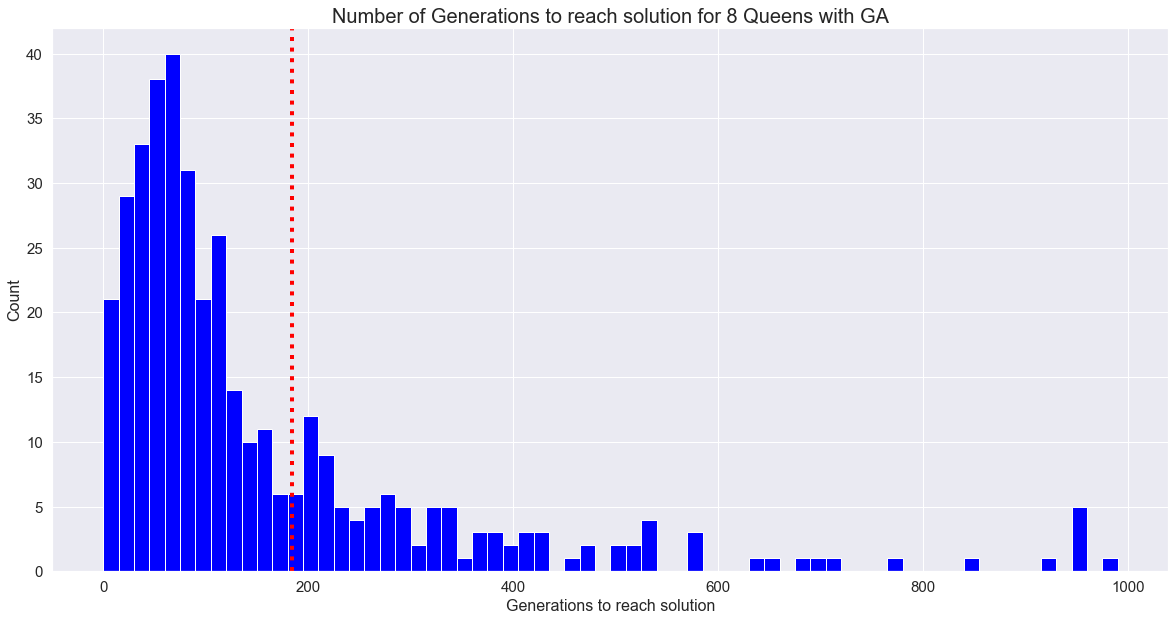

In [69]:
y = generations
problemString = "8 Queens"

def plotExperimentsGenerations(y, problemString):
    maxGenerations = np.max(generations)
    meanGeneratiosn = np.mean(generations)
    
    sns.set()
    plt.title(f'Number of Generations to reach solution for {problemString} with GA', fontsize=20)
    plt.hist(y, bins=np.arange(0, maxGenerations, 15), color='blue')
    plt.xlabel('Generations to reach solution', fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.axvline(x = meanGeneratiosn, label='Mean', ls=':', color='red', linewidth=4)
    plt.rcParams["figure.figsize"] = (20,10)
    plt.show()

plotExperimentsGenerations(y, problemString)